In [2]:
import random
def gen_undirected_graph_data(num_of_class = 4, edg_in_class = 20, prob_conn_in = 70, prob_conn_out = 30 ):
    # generate adjancency list
    adjlist = []
    
    for i in range(num_of_class*edg_in_class):
        node_links = []
        
        #insert first node
        node_links.append(i)
        
        #insert neighbors of neighbours
        for j in range(i+1,num_of_class*edg_in_class):
                
            r = random.random()*100
            #same class
            if int(i/edg_in_class)==int(j/edg_in_class):
                if r<=prob_conn_in:
                    node_links.append(j)
            #different class
            else:
                if r<=prob_conn_out:
                    node_links.append(j)
        adjlist.append(node_links)
    return adjlist

adj = gen_undirected_graph_data(edg_in_class = 250,prob_conn_in = 20,prob_conn_out = 3)
with open("graph20in_3out.adjlist", 'w') as target:
    for row in adj:
        line = " ".join(str(x) for x in row)
        #line.join("\n")
        target.write(line+'\n')

<IPython.core.display.Javascript object>


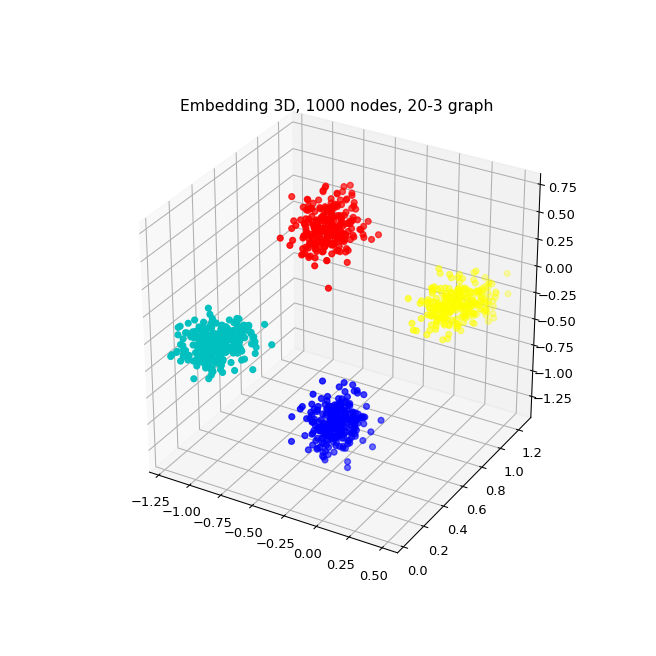

In [18]:
from mpl_toolkits.mplot3d import axes3d
import networkx as nx
import matplotlib.pyplot as plt

def make_adj_dict(f_adjlist):
    
    adj_dict={}
    
    with open(f_adjlist, 'r') as f:
        temp = f.readlines()

    content = [x.strip() for x in temp] 
    for row in content:
        row_t = row.split()
        #print(row.split())
        adj_dict[row_t[0]]=row_t[1:]
    
    #print(adj_dict)
    return adj_dict
def plot3d(edgelist, embedding, title='', node_color='blue', edge_color='black',linewidth=0.3):
    
    
    adj = make_adj_dict(edgelist)
    
    #data = embedding
    # read embedding and make embedding dict
    data = {}

    with open(embedding, 'r') as f:
        temp = f.readlines()

    content = [x.strip() for x in temp] 
    for row in content[1:]:
        row_t = row.split()
        data[row_t[0]]=(float(row_t[1]),float(row_t[2]),float(row_t[3]))
    
    #print(data)
    nodes = data.keys()
    nodes = sorted(nodes, key=lambda n : int(n))
    
    fig = plt.figure(0)
    ax = fig.add_subplot(111, projection='3d')
    
    # Plotting nodes from the embedding given their coordinates
    
    ax.scatter(
        [data[key][0] for key in nodes], 
        [data[key][1] for key in nodes], 
        [data[key][2] for key in nodes], 
        c=node_color
    )
    """
    # Plotting labels
    for key in nodes:
        ax.text(data[key][0]+0.03,data[key][1],data[key][2],key,fontsize=9)
    
    # Plotting edges between adjacent nodes
    for node in adj:
        neighbors = adj[node]
        
        X, Y, Z = [data[node][0]], [data[node][1]], [data[node][2]]
        
        for neighbor in neighbors:
            X.append(data[neighbor][0])
            X.append(data[node][0])
            
            Y.append(data[neighbor][1])
            Y.append(data[node][1])
            
            Z.append(data[neighbor][2])
            Z.append(data[node][2])
        
        ax.plot(X, Y, Z, color=edge_color,linewidth=linewidth)
    """    
    
    plt.title(title)

color_map=[]
colors = ['r','b','c','yellow']
for node in range(1000):
    if node<250:
        color_map.append(colors[0])
    elif 250<=node<500:
        color_map.append(colors[1])
    elif 500<=node<750:
        color_map.append(colors[2])
    else:
        color_map.append(colors[3])  
    

%matplotlib notebook
graph_f = 'C:/Users/Hp/Downloads/deepwalk/example_graphs/graph20in_3out.adjlist'
embedding_f= 'C:/Users/Hp/Downloads/deepwalk/graph20in_3out_3d.embeddings'


plt.rcParams["figure.figsize"] = (7,7)
plot3d(edgelist=graph_f, embedding=embedding_f ,node_color = color_map, title='Embedding 3D, 1000 nodes, 20-3 graph',linewidth=0.005)

In [9]:
adj = gen_undirected_graph_data(edg_in_class = 2500,prob_conn_in = 10,prob_conn_out = 3)
with open("graph10in_3out.adjlist", 'w') as target:
    for row in adj:
        line = " ".join(str(x) for x in row)
        #line.join("\n")
        target.write(line+'\n')

Training takes 6 minutes for graph with 10 000 nodes

<IPython.core.display.Javascript object>


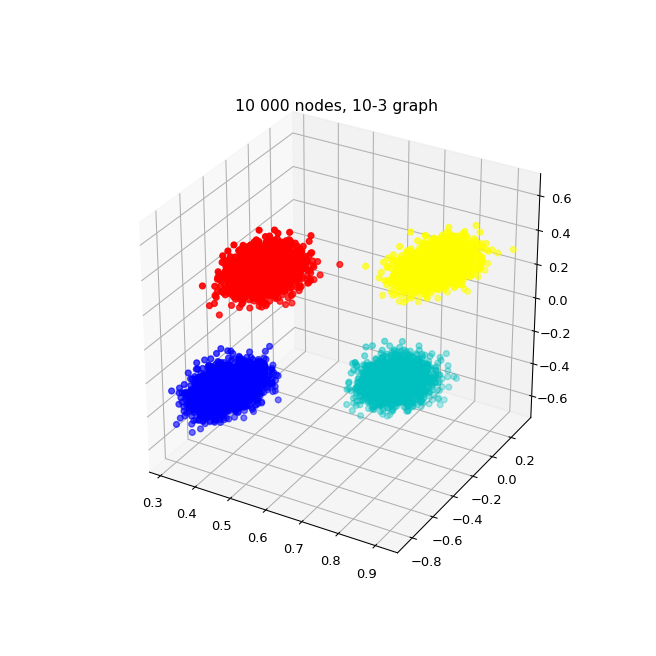

In [19]:
color_map=[]
colors = ['r','b','c','yellow']
for node in range(10000):
    if node<2500:
        color_map.append(colors[0])
    elif 2500<=node<5000:
        color_map.append(colors[1])
    elif 5000<=node<7500:
        color_map.append(colors[2])
    else:
        color_map.append(colors[3])  
    

%matplotlib notebook
graph_f = 'C:/Users/Hp/Downloads/deepwalk/example_graphs/graph10in_3out.adjlist'
embedding_f= 'C:/Users/Hp/Downloads/deepwalk/graph10in_3out_3d.embeddings'


plt.rcParams["figure.figsize"] = (7,7)
plot3d(edgelist=graph_f, embedding=embedding_f ,node_color = color_map, title='10 000 nodes, 10-3 graph',linewidth=0.001)

In [15]:
adj = gen_undirected_graph_data(edg_in_class = 10000,prob_conn_in = 5,prob_conn_out = 3)
with open("graph5in_3out.adjlist", 'w') as target:
    for row in adj:
        line = " ".join(str(x) for x in row)
        #line.join("\n")
        target.write(line+'\n')

Training takes 15 minutes for graph with 40 000 nodes and 4 workers

<IPython.core.display.Javascript object>


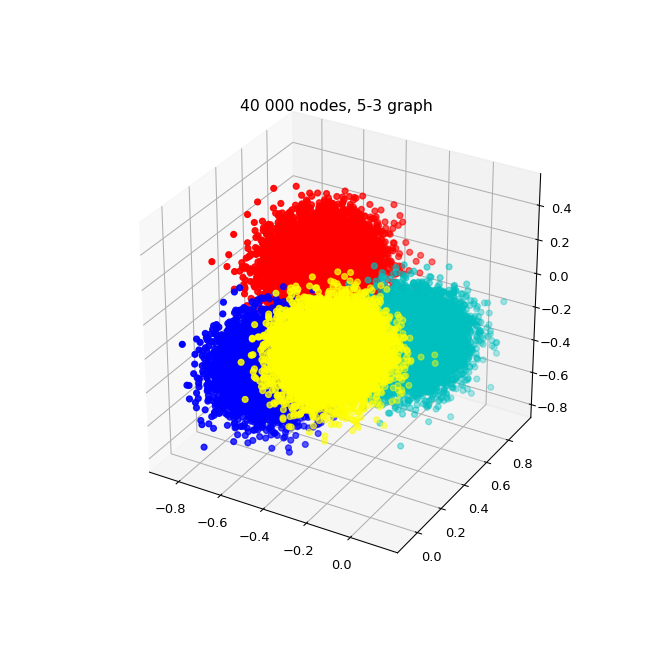

In [20]:
color_map=[]
colors = ['r','b','c','yellow']
for node in range(40000):
    if node<10000:
        color_map.append(colors[0])
    elif 10000<=node<20000:
        color_map.append(colors[1])
    elif 20000<=node<30000:
        color_map.append(colors[2])
    else:
        color_map.append(colors[3])  
    

%matplotlib notebook
graph_f = 'C:/Users/Hp/Downloads/deepwalk/example_graphs/graph5in_3out.adjlist'
embedding_f= 'C:/Users/Hp/Downloads/deepwalk/graph5in_3out_3d.embeddings'


plt.rcParams["figure.figsize"] = (7,7)
plot3d(edgelist=graph_f, embedding=embedding_f ,node_color = color_map, title='40 000 nodes, 5-3 graph',linewidth=0.001)